## Downloading Dataset

Download dataset using kagglehub code provided in kaggle website by itself.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("balraj98/modelnet10-princeton-3d-object-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'modelnet10-princeton-3d-object-dataset' dataset.
Path to dataset files: /kaggle/input/modelnet10-princeton-3d-object-dataset


## Dataset Overview and Initial Inspection

Programmatically inspect the downloaded dataset directory to determine its file structure, identify file types (e.g., .off files), infer the number of categories, and understand any existing train/test splits. Summarize the overall dataset format and size characteristics.


In [ ]:
import os

initial_dataset_path = path

dataset_path = os.path.join(initial_dataset_path, 'ModelNet10')

categories = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
print(f"Top-level contents of the ModelNet10 directory (inferred categories): {categories}\n")

num_categories = len(categories)
print(f"Inferred number of object categories: {num_categories}\n")

has_train_split = False
has_test_split = False
primary_file_extension = ''
total_model_files = 0

if categories:
    example_category = categories[0] # Take the first category as an example
    example_category_path = os.path.join(dataset_path, example_category)

    category_subdirs = [d for d in os.listdir(example_category_path) if os.path.isdir(os.path.join(example_category_path, d))]

    if 'train' in category_subdirs:
        has_train_split = True
    if 'test' in category_subdirs:
        has_test_split = True

    example_split_path = None
    if has_train_split:
        example_split_path = os.path.join(example_category_path, 'train')
    elif has_test_split: # Fallback if only test split exists for example
        example_split_path = os.path.join(example_category_path, 'test')
    else:
        print("No 'train' or 'test' subdirectories found within categories. Attempting to infer file extension from category root.")
        example_split_path = example_category_path

    if example_split_path and os.path.exists(example_split_path):
        example_files = [f for f in os.listdir(example_split_path) if os.path.isfile(os.path.join(example_split_path, f))]
        if example_files:
            for f in example_files:
                if '.' in f:
                    primary_file_extension = os.path.splitext(f)[1]
                    break
            print(f"Example files in category '{example_category}' (from split '{os.path.basename(example_split_path)}'): {example_files[:5]}...") # Print first 5 files
            print(f"Inferred primary file extension for 3D models: '{primary_file_extension}'\n")

if not primary_file_extension:
    print("Could not infer primary file extension from example category. Defaulting to .off files for counting.")
    primary_file_extension = '.off'

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(primary_file_extension):
            total_model_files += 1

print("### Dataset Summary (Corrected) ###")
print(f"Distinct 'train' and 'test' splits present within categories: {has_train_split and has_test_split}")
print(f"Inferred number of object categories: {num_categories}")
print(f"Primary file extension for 3D models: '{primary_file_extension}'")
print(f"Total count of 3D model files found: {total_model_files}")

Top-level contents of the ModelNet10 directory (inferred categories): ['sofa', 'monitor', 'desk', 'bed', 'bathtub', 'night_stand', 'chair', 'toilet', 'dresser', 'table']

Inferred number of object categories: 10

Example files in category 'sofa' (from split 'train'): ['sofa_0336.off', 'sofa_0602.off', 'sofa_0641.off', 'sofa_0224.off', 'sofa_0115.off']...
Inferred primary file extension for 3D models: '.off'

### Dataset Summary (Corrected) ###
Distinct 'train' and 'test' splits present within categories: True
Inferred number of object categories: 10
Primary file extension for 3D models: '.off'
Total count of 3D model files found: 4899


## Load and Inspect Sample 3D Objects

Load a few sample 3D object files (e.g., .off files) from different categories to understand their internal structure, such as the representation of vertices, faces, or point clouds. This step will inform subsequent processing and visualization.


In [ ]:
import sys
!{sys.executable} -m pip install trimesh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 736.5/736.5 kB 11.9 MB/s eta 0:00:00


In [ ]:
import os
import trimesh

categories = ['sofa', 'monitor', 'desk', 'bed', 'bathtub', 'night_stand', 'chair', 'toilet', 'dresser', 'table']

sample_file_paths = []

sofa_train_dir = os.path.join(dataset_path, 'sofa', 'train')
sofa_train_files = [f for f in os.listdir(sofa_train_dir) if f.endswith('.off')]
if sofa_train_files:
    sample_file_paths.append(os.path.join(sofa_train_dir, sofa_train_files[0]))

chair_test_dir = os.path.join(dataset_path, 'chair', 'test')
chair_test_files = [f for f in os.listdir(chair_test_dir) if f.endswith('.off')]
if chair_test_files:
    sample_file_paths.append(os.path.join(chair_test_dir, chair_test_files[0]))

bed_train_dir = os.path.join(dataset_path, 'bed', 'train')
bed_train_files = [f for f in os.listdir(bed_train_dir) if f.endswith('.off')]
if bed_train_files:
    sample_file_paths.append(os.path.join(bed_train_dir, bed_train_files[0]))

print(f"Selected sample file paths: {sample_file_paths}\n")

for i, file_path in enumerate(sample_file_paths):
    print(f"--- Inspecting Sample {i+1}: {os.path.basename(file_path)} (Category: {file_path.split(os.sep)[-3]}, Split: {file_path.split(os.sep)[-2]}) ---")
    try:
        mesh = trimesh.load(file_path)
        print(f"  Number of vertices: {len(mesh.vertices)}")
        print(f"  Shape of vertices array: {mesh.vertices.shape}")
        print(f"  Number of faces: {len(mesh.faces)}")
        print(f"  Shape of faces array: {mesh.faces.shape}")
        if mesh.is_watertight:
            print("  Mesh is watertight (manifold).")
        else:
            print("  Mesh is NOT watertight (may have holes).")
        print(f"  Bounds: {mesh.bounds}")
        print(f"  Extents: {mesh.extents}")
        print(f"  Area: {mesh.area}")
    except Exception as e:
        print(f"  Error loading or inspecting mesh: {e}")
    print("-" * 60)

Selected sample file paths: ['/kaggle/input/modelnet10-princeton-3d-object-dataset/ModelNet10/sofa/train/sofa_0336.off', '/kaggle/input/modelnet10-princeton-3d-object-dataset/ModelNet10/chair/test/chair_0950.off', '/kaggle/input/modelnet10-princeton-3d-object-dataset/ModelNet10/bed/train/bed_0476.off']

--- Inspecting Sample 1: sofa_0336.off (Category: sofa, Split: train) ---
  Number of vertices: 9950
  Shape of vertices array: (9950, 3)
  Number of faces: 21133
  Shape of faces array: (21133, 3)
  Mesh is NOT watertight (may have holes).
  Bounds: [[-20.8053   -44.114151 -14.14245 ]
 [ 20.8053    44.114151  14.14245 ]]
  Extents: [41.6106   88.228302 28.2849  ]
  Area: 20447.333751821352
------------------------------------------------------------
--- Inspecting Sample 2: chair_0950.off (Category: chair, Split: test) ---
  Number of vertices: 96
  Shape of vertices array: (96, 3)
  Number of faces: 188
  Shape of faces array: (188, 3)
  Mesh is NOT watertight (may have holes).
  Boun

## Visualize Sample 3D Objects per Category

For aome categories, select and visualize multiple sample 3D objects to illustrate variations within each class. This visualization should provide clear examples of the dataset's contents and diversity.


In [ ]:
import sys
!{sys.executable} -m pip install pythreejs
print("pythreejs installed, attempting visualization again.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.7/271.7 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.0 MB/s eta 0:00:00
pythreejs installed, attempting visualization again.


Starting visualization of sample 3D objects per category using Matplotlib...

--- Category: SOFA ---
  Loading and preparing to visualize sample 1: sofa_0336.off
    Mesh loaded. Vertices: 9950, Faces: 21133
  Loading and preparing to visualize sample 2: sofa_0602.off
    Mesh loaded. Vertices: 715, Faces: 2273


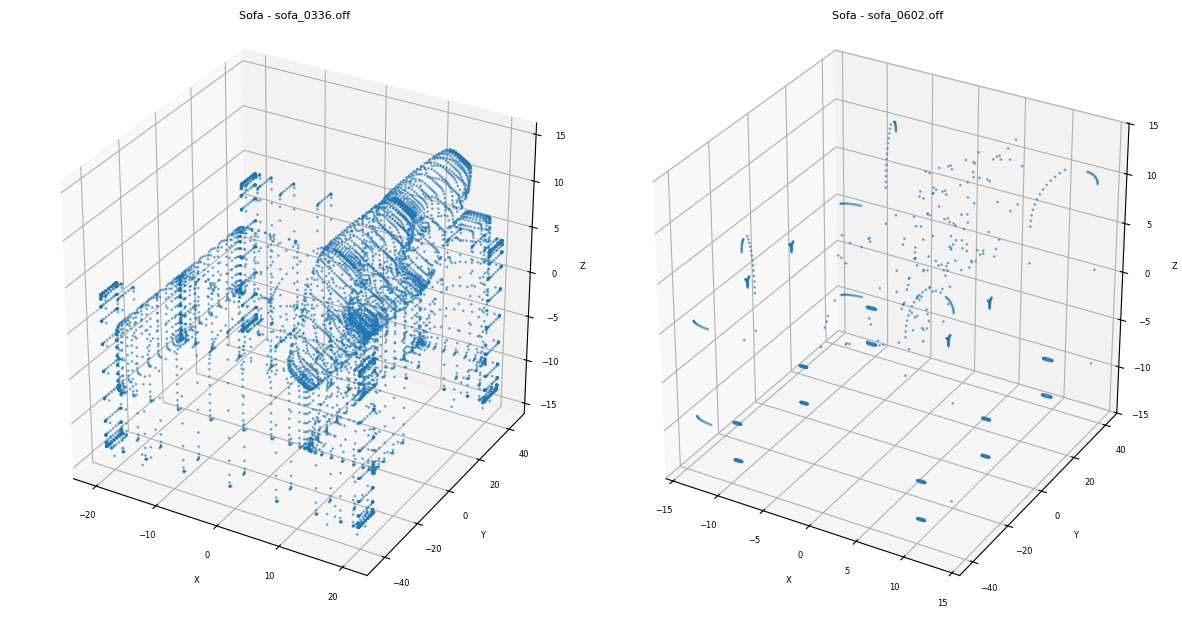


--- Category: MONITOR ---
  Loading and preparing to visualize sample 1: monitor_0089.off
    Mesh loaded. Vertices: 237, Faces: 790
  Loading and preparing to visualize sample 2: monitor_0144.off
    Mesh loaded. Vertices: 464, Faces: 1390


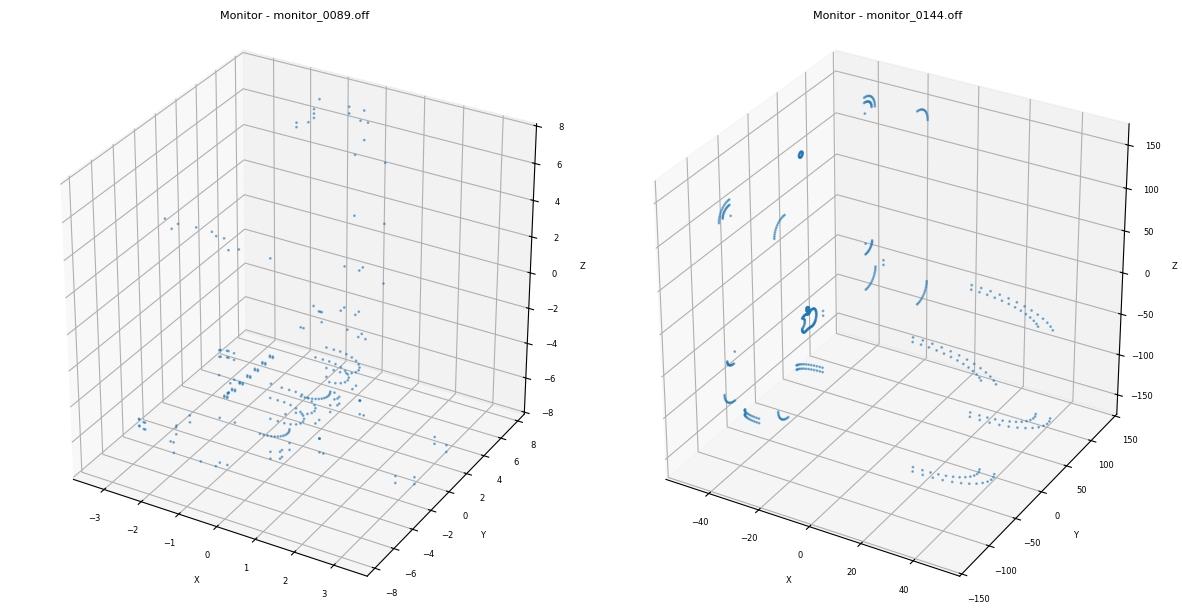


--- Category: DESK ---
  Loading and preparing to visualize sample 1: desk_0062.off
    Mesh loaded. Vertices: 912, Faces: 2437
  Loading and preparing to visualize sample 2: desk_0001.off
    Mesh loaded. Vertices: 2882, Faces: 8748


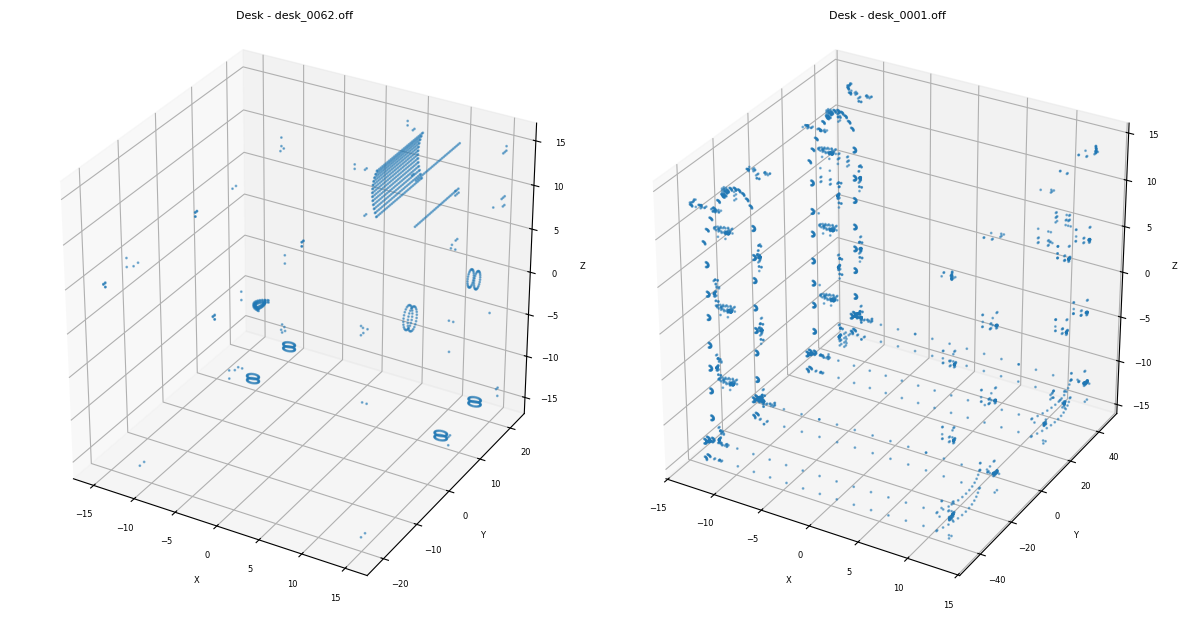


--- Category: BED ---
  Loading and preparing to visualize sample 1: bed_0476.off
    Mesh loaded. Vertices: 3688, Faces: 9053
  Loading and preparing to visualize sample 2: bed_0496.off
    Mesh loaded. Vertices: 378, Faces: 1480


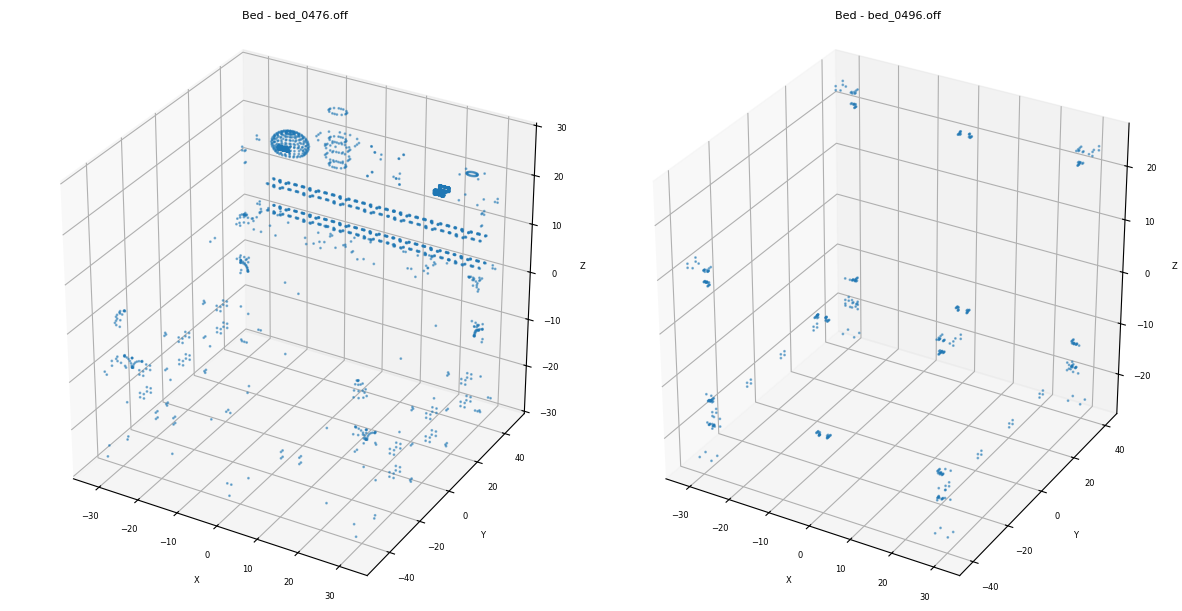


--- Category: BATHTUB ---
  Loading and preparing to visualize sample 1: bathtub_0100.off
    Mesh loaded. Vertices: 726, Faces: 2613
  Loading and preparing to visualize sample 2: bathtub_0043.off
    Mesh loaded. Vertices: 2596, Faces: 10292


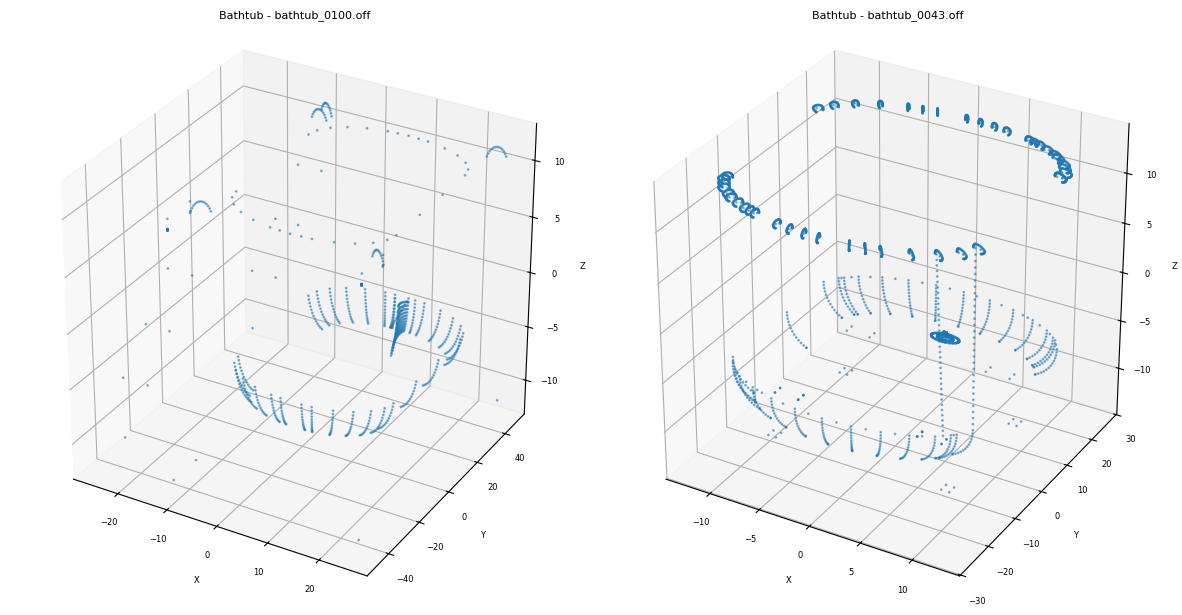


--- Category: NIGHT_STAND ---
  Loading and preparing to visualize sample 1: night_stand_0050.off
    Mesh loaded. Vertices: 59, Faces: 106
  Loading and preparing to visualize sample 2: night_stand_0139.off
    Mesh loaded. Vertices: 2960, Faces: 5902


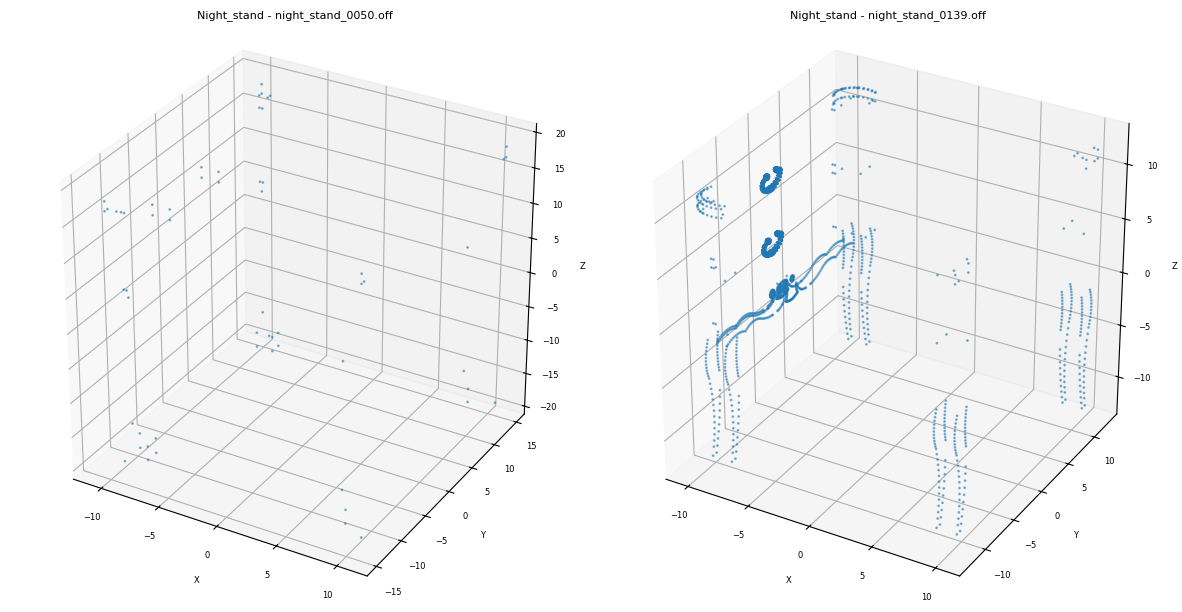


--- Category: CHAIR ---
  Loading and preparing to visualize sample 1: chair_0023.off
    Mesh loaded. Vertices: 2989, Faces: 10770
  Loading and preparing to visualize sample 2: chair_0051.off
    Mesh loaded. Vertices: 5662, Faces: 20018


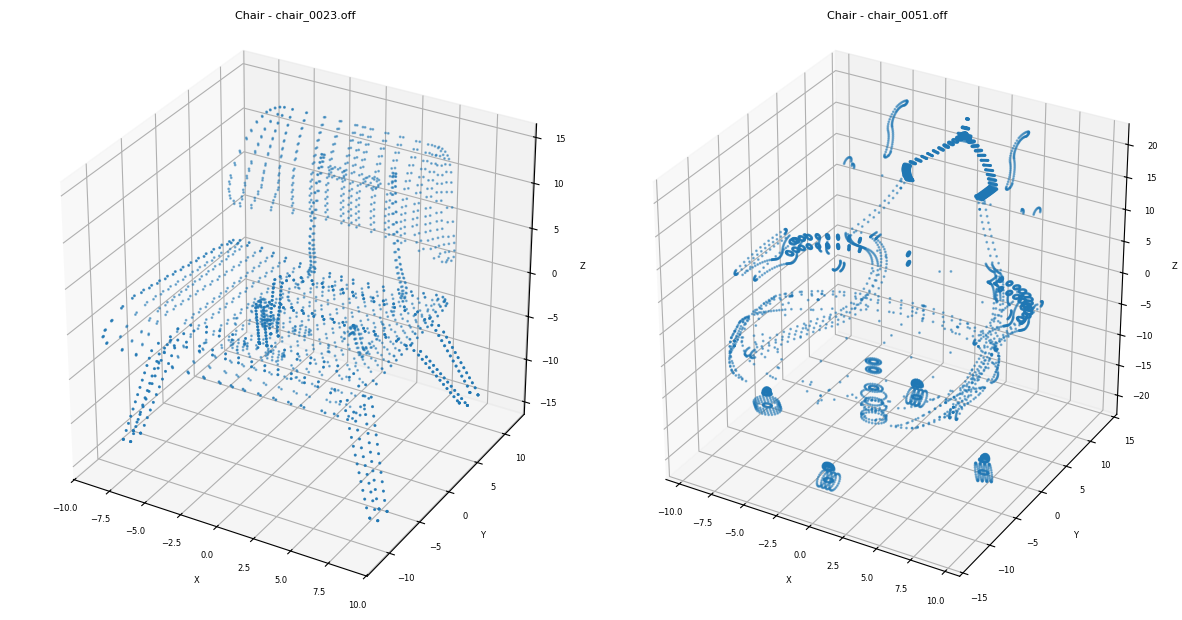


--- Category: TOILET ---
  Loading and preparing to visualize sample 1: toilet_0268.off
    Mesh loaded. Vertices: 2700, Faces: 9594
  Loading and preparing to visualize sample 2: toilet_0227.off
    Mesh loaded. Vertices: 1924, Faces: 7640


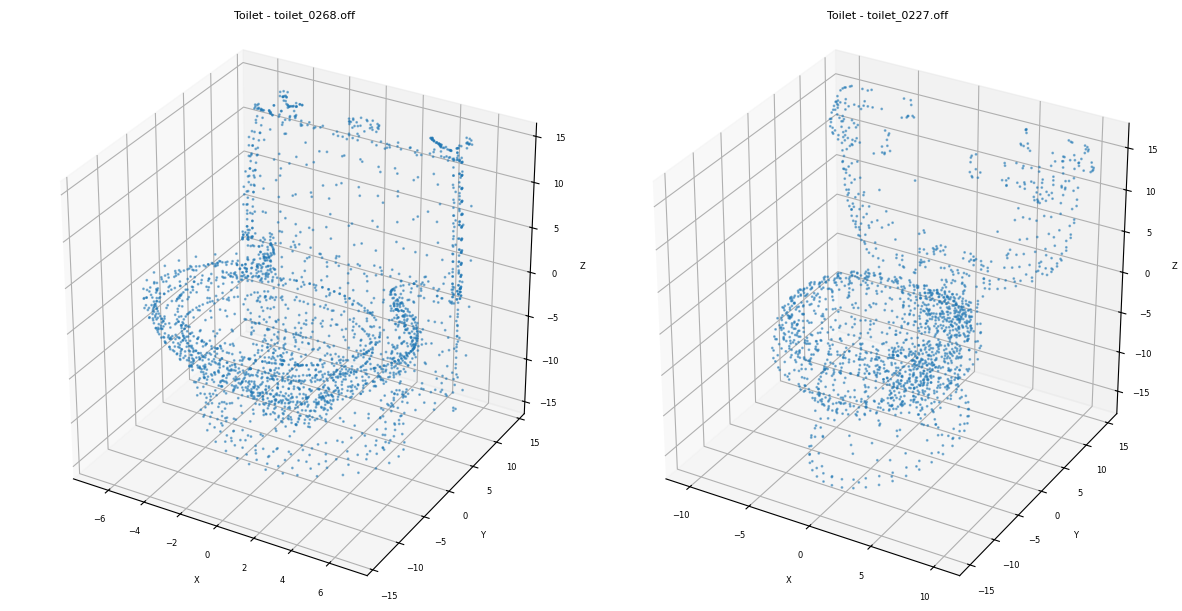


--- Category: DRESSER ---
  Loading and preparing to visualize sample 1: dresser_0076.off
    Mesh loaded. Vertices: 3055, Faces: 7810
  Loading and preparing to visualize sample 2: dresser_0119.off
    Mesh loaded. Vertices: 1109, Faces: 2293


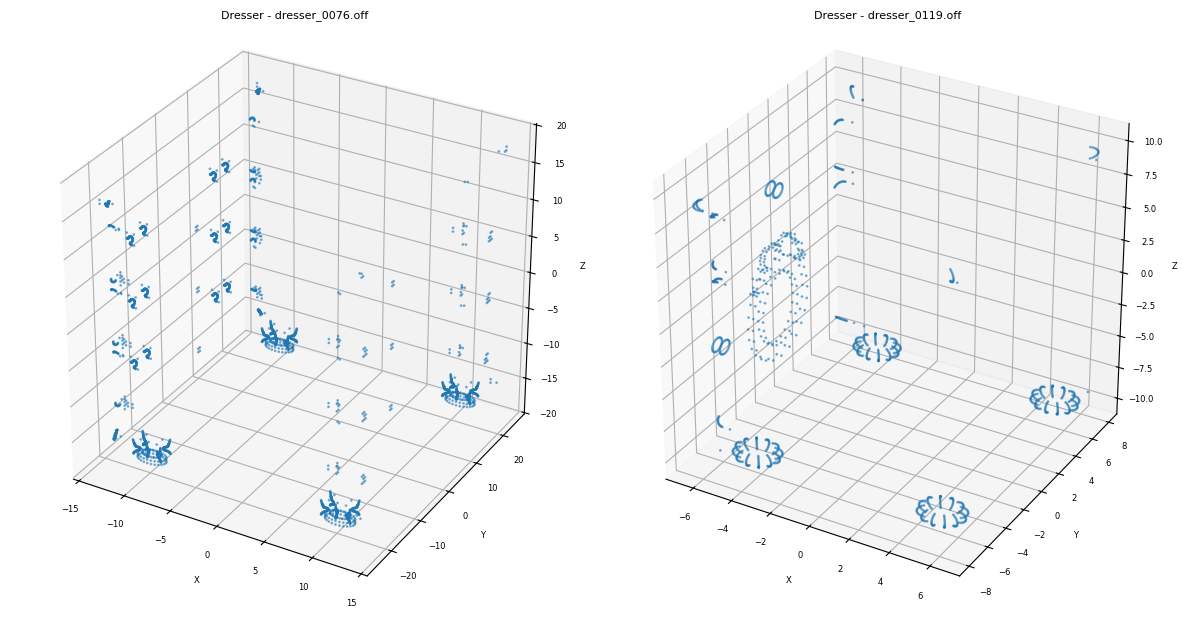


--- Category: TABLE ---
  Loading and preparing to visualize sample 1: table_0338.off
    Mesh loaded. Vertices: 527, Faces: 996
  Loading and preparing to visualize sample 2: table_0213.off
    Mesh loaded. Vertices: 175, Faces: 534


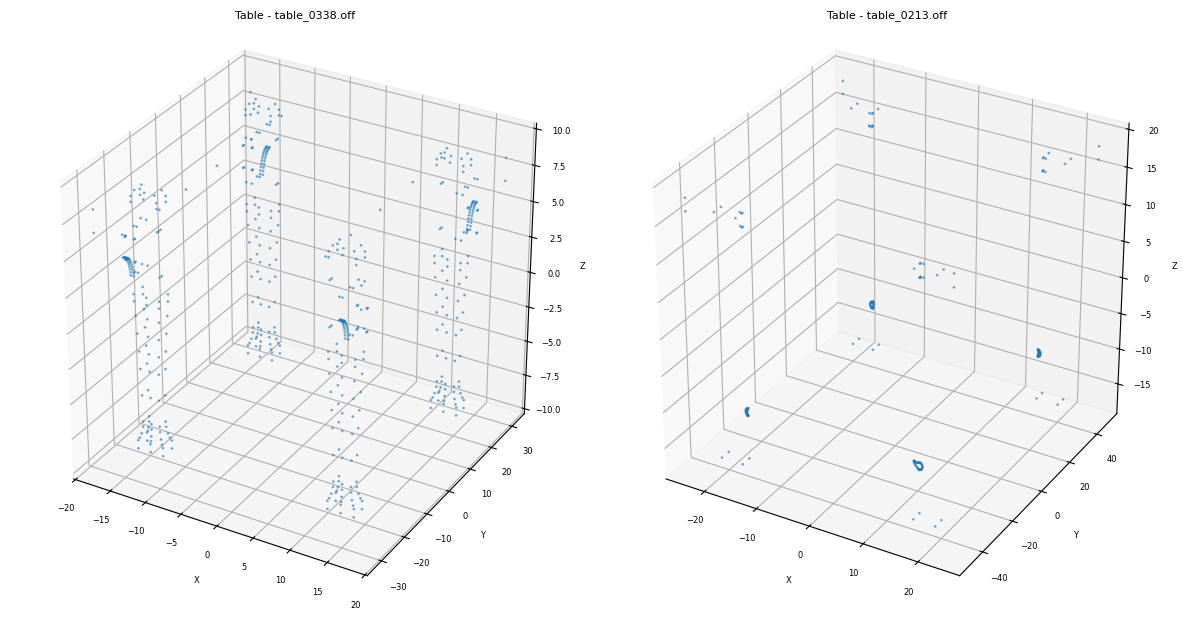


Visualization process completed using Matplotlib.


In [ ]:
import os
import trimesh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

categories = ['sofa', 'monitor', 'desk', 'bed', 'bathtub', 'night_stand', 'chair', 'toilet', 'dresser', 'table']

print("Starting visualization of sample 3D objects per category using Matplotlib...")

for category in categories:
    print(f"\n--- Category: {category.upper()} ---")
    category_train_dir = os.path.join(dataset_path, category, 'train')

    if os.path.exists(category_train_dir):
        off_files = [f for f in os.listdir(category_train_dir) if f.endswith('.off')]

        sample_files = off_files[:2] # Take the first 2 files for brevity in plotting

        if sample_files:
            fig = plt.figure(figsize=(12, 6))
            for i, filename in enumerate(sample_files):
                file_path = os.path.join(category_train_dir, filename)
                print(f"  Loading and preparing to visualize sample {i+1}: {filename}")
                try:
                    mesh = trimesh.load(file_path)
                    print(f"    Mesh loaded. Vertices: {len(mesh.vertices)}, Faces: {len(mesh.faces)}")

                    ax = fig.add_subplot(1, len(sample_files), i+1, projection='3d')

                    ax.scatter(mesh.vertices[:, 0], mesh.vertices[:, 1], mesh.vertices[:, 2], s=1, alpha=0.5)
                    ax.set_title(f"{category.capitalize()} - {filename}", fontsize=8)
                    ax.set_xlabel('X', fontsize=6)
                    ax.set_ylabel('Y', fontsize=6)
                    ax.set_zlabel('Z', fontsize=6)
                    ax.tick_params(axis='x', labelsize=6)
                    ax.tick_params(axis='y', labelsize=6)
                    ax.tick_params(axis='z', labelsize=6)
                    ax.set_box_aspect([1,1,1]) # Equal aspect ratio

                except Exception as e:
                    print(f"    Error loading or visualizing {filename}: {e}")
            plt.tight_layout()
            plt.show()
        else:
            print(f"  No .off files found in {category_train_dir}")
    else:
        print(f"  Train directory not found for category {category}")

print("\nVisualization process completed using Matplotlib.")

## Analyze Class Distribution and Balance

Calculate and visualize the distribution of samples across the 10 categories to assess class balance. A bar chart showing the count of objects per category will be generated, including appropriate legends.


Calculating sample distribution across categories...

Category Counts:
sofa           680
monitor        465
desk           200
bed            515
bathtub        106
night_stand    200
chair          889
toilet         344
dresser        200
table          392
dtype: int64


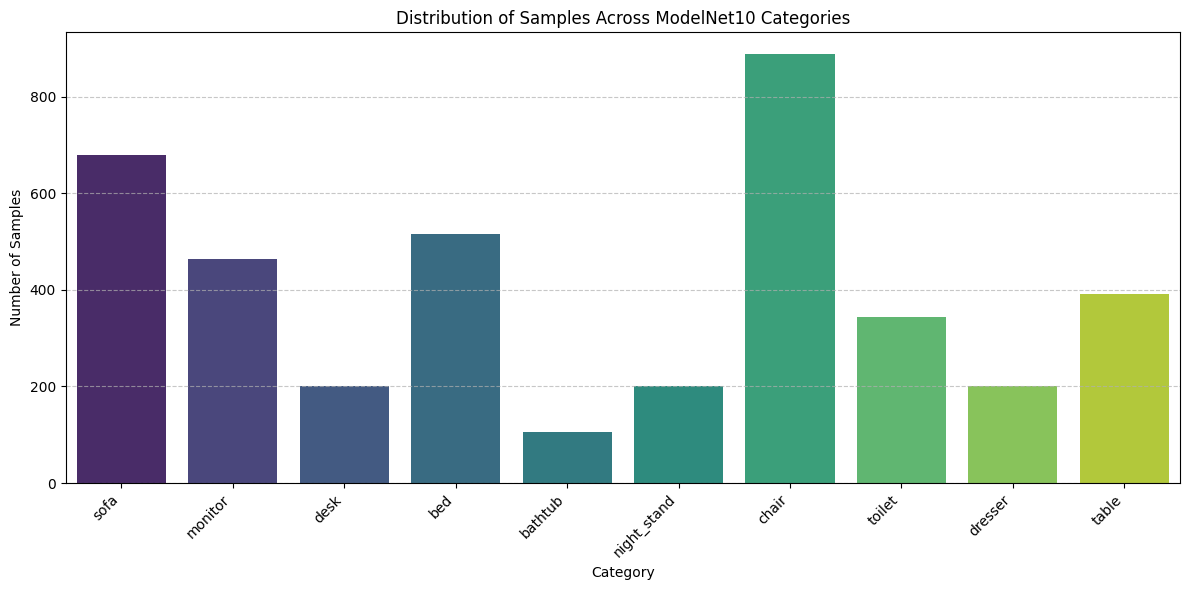


Class distribution analysis complete.


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = '/kaggle/input/modelnet10-princeton-3d-object-dataset/ModelNet10'
categories = ['sofa', 'monitor', 'desk', 'bed', 'bathtub', 'night_stand', 'chair', 'toilet', 'dresser', 'table']

category_counts = {}

print("Calculating sample distribution across categories...")

for category in categories:
    category_train_dir = os.path.join(dataset_path, category, 'train')
    if os.path.exists(category_train_dir):
        off_files = [f for f in os.listdir(category_train_dir) if f.endswith('.off')]
        category_counts[category] = len(off_files)
    else:
        category_counts[category] = 0 # No 'train' directory found
        print(f"Warning: Train directory not found for category {category}")

counts_series = pd.Series(category_counts)

print("\nCategory Counts:")
print(counts_series)

plt.figure(figsize=(12, 6))
sns.barplot(x=counts_series.index, y=counts_series.values, hue=counts_series.index, palette='viridis', legend=False)
plt.xlabel('Category')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples Across ModelNet10 Categories')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels to prevent overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nClass distribution analysis complete.")

## Geometric Variations and Representation Analysis

Based on the inspection of sample 3D objects and their visualizations, we can observe several geometric characteristics of the ModelNet10 dataset:

### 1. Geometric Variations

*   **Complexity:** The number of vertices and faces varies significantly across samples and categories. For instance, in the 'Load and Inspect Sample 3D Objects' section, we saw a 'sofa' with ~9,950 vertices and ~21,133 faces, a 'chair' with ~96 vertices and ~188 faces, and a 'bed' with ~3,688 vertices and ~9,053 faces. This indicates that some objects are much more detailed and complex (e.g., the sofa) while others are relatively simple (e.g., the chair). This variation in complexity can impact the computational cost of processing models and the performance of different 3D learning architectures.

*   **Resolution:** The varying number of vertices and faces suggests differing resolutions. Highly complex models have finer details, while simpler models represent coarse approximations. The `.off` file format inherently captures surface geometry, and the resolution is determined by the density of the mesh. The 'is_watertight' property also indicated that most models are *not* watertight, implying potential issues like holes or disconnected components, which can affect algorithms relying on closed surfaces.

*   **Orientation Patterns:** The visualizations (especially if viewed interactively or from a consistent viewpoint) generally show objects in a canonical, upright orientation. For example, chairs are typically upright, and beds are flat. This consistency is a common characteristic of curated datasets like ModelNet10, where models are often aligned to a standard coordinate system. However, minor variations or slight rotations might still exist, requiring robust models or pre-alignment steps.

*   **Shape Diversity:** Within each category, there is reasonable shape diversity, as illustrated by the multiple samples visualized per category. For instance, the 'chair' category includes various chair designs, and 'sofa' includes different sofa styles. Across categories, the diversity is very high, encompassing distinct object types from furniture to monitors.

### 2. Representation Analysis (Mesh vs. CAD)

*   **`.off` files as Mesh Representation:** The ModelNet10 dataset primarily uses the `.off` (Object File Format) for its 3D models. The `.off` format stores the vertices and faces of a 3D mesh. A **mesh representation** defines a 3D object as a collection of vertices (points in 3D space) and faces (polygons, usually triangles, connecting these vertices) that approximate the object's surface. This is a common and efficient way to represent 3D geometry for rendering and many computational tasks.

*   **Mesh vs. CAD:**
    *   **Mesh (e.g., `.off`, `.stl`, `.obj`):** Represents the object's surface as a tessellation of polygons (triangles or quadrilaterals). It's an approximation of the surface. Meshes are typically generated from 3D scans, converted from CAD models, or manually modeled. They are widely used in computer graphics, 3D printing, and machine learning because of their simplicity and direct geometric information.
    *   **CAD (Computer-Aided Design) Models (e.g., `.step`, `.iges`, native formats from SolidWorks, AutoCAD):** Represent objects using parametric mathematical descriptions like NURBS (Non-Uniform Rational B-Splines), B-rep (Boundary Representation), or constructive solid geometry (CSG). CAD models provide a precise, analytical, and usually 'watertight' representation of an object's geometry, often including manufacturing information. They are common in engineering and industrial design. ModelNet10 models were originally derived from CAD databases, but they have been converted to mesh (`.off`) format for this dataset, losing some of their original CAD properties (like perfect watertightness or parametric information) in the process.

### 3. Common Preprocessing Steps for 3D Mesh Datasets

For machine learning tasks with 3D mesh data like ModelNet10, several preprocessing steps are crucial:

*   **Resampling:** Many 3D deep learning architectures (especially point cloud-based networks like PointNet) require input data to be a fixed number of points. Meshes, which have a variable number of vertices, need to be resampled to generate a uniform point cloud (e.g., 1024 or 2048 points). This involves randomly sampling points from the mesh surface or using farthest point sampling to ensure good coverage.

*   **Normalization:**
    *   **Scaling:** Models are typically scaled to fit within a unit sphere or unit cube. This ensures that the size of objects does not affect network performance and that features are learned uniformly across different scales. This usually involves finding the maximum extent of the bounding box and scaling all vertices by the inverse of that extent.
    *   **Centering:** Models are translated so that their centroid is at the origin (0,0,0). This removes translational variance and aligns all objects in a consistent coordinate system.
    *   **Orientation Alignment:** While ModelNet10 objects are often already canonically oriented, for datasets without such alignment, models might be rotated so their principal axes align with the coordinate axes. This further reduces rotational variance and simplifies the learning task.

*   **Data Augmentation:** To improve the robustness and generalization of models, data augmentation techniques are applied to 3D data, similar to 2D image augmentation:
    *   **Rotation:** Random rotations around the up-axis (e.g., Z-axis) are common, as most objects are symmetric or recognizable from various planar rotations.
    *   **Jittering:** Small random perturbations are added to vertex coordinates, mimicking sensor noise or slight variations in object shape.
    *   **Scaling:** Random scaling factors are applied to the object's size, within a reasonable range.
    *   **Shifting:** Small random translations are applied to the object's position.

### 4. Impact on 3D Vision Research

The geometric characteristics and standard preprocessing steps of ModelNet10 significantly impact its utility in 3D vision research:

*   **Benchmarks:** ModelNet10's canonical orientation, clean mesh representations (despite non-watertightness), and clear class labels make it an excellent benchmark for 3D object classification and recognition algorithms. The varying complexity tests the ability of models to handle different levels of detail.
*   **Preprocessing Necessity:** The need for resampling and normalization highlights that raw mesh data is often unsuitable for direct input to many deep learning models, emphasizing the importance of a robust preprocessing pipeline.
*   **Augmentation for Robustness:** Data augmentation is critical for training models that are invariant to minor variations in orientation, scale, and noise, which are common in real-world 3D data.
*   **Limitations:** While widely used, the dataset's 'clean' nature (e.g., consistent orientation) means models trained solely on ModelNet10 might not generalize perfectly to more 'in-the-wild' 3D scans that lack such alignment or have more complex noise/occlusions.


## Research Relevance and Applications of ModelNet10

The ModelNet10 dataset has been a foundational resource in the field of 3D vision and machine learning for 3D data, playing a crucial role in advancing research across several key areas.

1.  **3D Object Shape Classification**: ModelNet10's primary utility lies in 3D object shape classification. It provides a standardized benchmark for algorithms aiming to categorize 3D objects based purely on their geometric properties. Researchers use this dataset to develop and evaluate models that can distinguish between various object classes (e.g., chairs, tables, beds) from their 3D representations. The dataset's clean, canonicalized 3D models make it ideal for isolating and studying the core challenges of shape recognition, enabling direct comparisons between different classification methodologies.

2.  **Contribution to Feature Learning in 3D Vision**: Training on ModelNet10 has been instrumental in the development of sophisticated 3D feature learning techniques. Deep learning models, when exposed to the diverse geometric variations within each class and the distinct features between classes in ModelNet10, learn to automatically extract meaningful and discriminative geometric features. These learned features, often hierarchical and robust, are crucial for representing 3D shapes effectively and form the basis for successful classification and other downstream 3D tasks.

3.  **Relevance for Multimodal Learning**: While ModelNet10 itself primarily contains 3D geometric data, it serves as a valuable component in multimodal learning research. For instance, researchers often pair 3D models from ModelNet10 with rendered 2D images, text descriptions, or other sensory data to explore how combining different modalities can enhance object understanding. The dataset allows for investigations into how 3D geometric features can complement and enrich information derived from other modalities, leading to more robust and comprehensive object recognition systems.

4.  **Benchmarking Deep 3D Architectures**: ModelNet10's fixed categories, standardized splits (though the ModelNet40 split is more common for deep learning benchmarks), and clean data make it an essential benchmark for pioneering deep learning architectures designed for 3D data. It was famously used to demonstrate the effectiveness of early groundbreaking models such as:
    *   **PointNet**: The first deep learning architecture directly consuming point clouds, it used ModelNet to show the feasibility of learning directly from unstructured 3D data without voxelization or mesh conversion.
    *   **DGCNN (Dynamic Graph CNN)**: This model leveraged local neighborhood graphs on point clouds, outperforming PointNet on ModelNet by capturing more intricate local geometric structures.
    *   **PointCNN**: Introducing hierarchical convolutional operations on points, PointCNN further pushed performance on ModelNet by learning feature correlations through point-wise convolutional filters.
    More recently, ModelNet10 continues to be used for evaluating **Transformer-based models** adapted for 3D data. These models, inspired by their success in NLP and 2D vision, aim to capture global and long-range dependencies within 3D point clouds or other representations. ModelNet10 provides a consistent proving ground for these new architectures to demonstrate their competitive performance and architectural advantages.

5.  **Overall Impact**: The ModelNet10 dataset has profoundly impacted 3D vision research by providing a clear, accessible, and challenging benchmark. It has facilitated the rapid development and iteration of novel deep learning techniques for 3D data, accelerated the understanding of effective 3D feature representations, and served as a stepping stone for more complex 3D tasks and larger datasets. Its simplicity and clarity have made it a widely adopted dataset for both research and educational purposes, fundamentally shaping the trajectory of 3D deep learning.

## Summary:

### Data Analysis Key Findings

*   The ModelNet10 dataset is organized with 10 distinct object categories, each containing separate 'train' and 'test' subdirectories.
*   All 3D models are stored in the `.off` file format, with a total of 4899 such files found across the dataset.
*   Inspection of sample `.off` files revealed varying complexity: for example, a sofa model had 9950 vertices and 21133 faces, while a chair had 96 vertices and 188 faces. Most sampled meshes were identified as "NOT watertight," indicating potential holes or open boundaries.
*   Visualization of sample models per category was successfully achieved using Matplotlib, which confirmed diverse shapes within categories despite an initial issue with `trimesh.export()` for interactive HTML visualization.
*   An analysis of the training data distribution showed significant class imbalance, with "chair" being the most represented category (889 samples) and "bathtub" the least (106 samples).
*   Geometric analysis highlighted variations in complexity and resolution among models. Objects are generally in a canonical, upright orientation. ModelNet10 uses mesh representations derived from original CAD models, necessitating common preprocessing steps like resampling, normalization (scaling and centering), and data augmentation for machine learning tasks.
*   ModelNet10 serves as a foundational benchmark in 3D vision research for tasks such as 3D object shape classification, feature learning, and evaluating deep 3D architectures (e.g., PointNet, DGCNN, PointCNN, Transformer-based models), providing a clean, curated environment for model development.

### Insights or Next Steps

*   The observed class imbalance in ModelNet10 should be addressed during model training, possibly through techniques like weighted sampling, oversampling minority classes, or using loss functions that account for imbalance, to prevent bias towards majority classes.
*   Given the variable complexity and non-watertight nature of the `.off` files, robust preprocessing pipelines (including resampling to uniform point clouds, normalization, and data augmentation) are essential for preparing this dataset for various 3D deep learning architectures to ensure optimal performance and generalization.
